## Prediction of Recovered Cases of India using DECISION TREE ALGORITHM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data= pd.read_csv("Covid19_India11.csv")
data

,Date,Counting_from_August,Confirmed Cases,Recovered Cases,Deceased Cases
0,2020-8-1,1,1752171,1146913,37408
1,2020-8-2,2,1804843,1187268,38168
2,2020-8-3,3,1855331,1230338,38974
3,2020-8-4,4,1906613,1281558,39823
4,2020-8-5,5,1963239,1327141,40742
5,2020-8-6,6,2025409,1377282,41641
6,2020-8-7,7,2086864,1427669,42577
7,2020-8-8,8,2152020,1479804,43452
8,2020-8-9,9,2214137,1534278,44465
9,2020-8-10,10,2267153,1581640,45352


In [3]:
real_x= data.iloc[:,1].values
real_y= data.iloc[:,3].values
real_x= real_x.reshape(-1,1)
real_y= real_y.reshape(-1,1)

In [4]:
training_x,testing_x,training_y,testing_y = train_test_split(real_x,real_y,test_size=0.2,random_state=0)

In [5]:
de= DecisionTreeRegressor(random_state=0)
de.fit(training_x,training_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [6]:
y_predict= de.predict(testing_x)

In [7]:
testing_y

array([[2336796],
       [2220799],
       [2523443],
       [1327141],
       [1638101],
       [1918076],
       [2712520],
       [1695860]], dtype=int64)

In [8]:
y_predict

array([2279900., 2157941., 2467252., 1281558., 1581640., 1860672.,
       2647538., 1750636.])

In [9]:
de.predict([[31]])

array([2837377.])

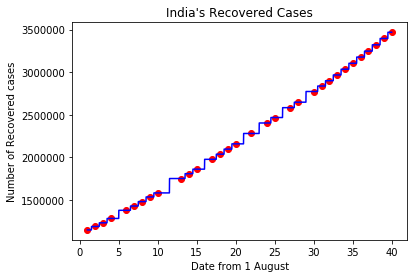

In [10]:
x_grid= np.arange(min(training_x),max(training_x),0.01)
x_grid= x_grid.reshape((len(x_grid),1))
plt.scatter(training_x,training_y, color="red")
plt.plot(x_grid,de.predict(x_grid),color="blue")
plt.title("India's Recovered Cases")
plt.xlabel("Date from 1 August")
plt.ylabel("Number of Recovered cases")
plt.show()         

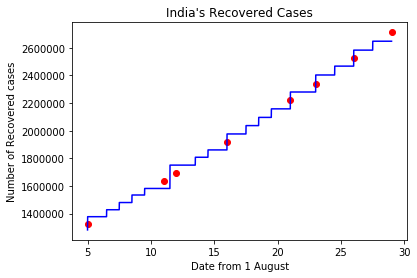

In [11]:
x_grid= np.arange(min(testing_x),max(testing_x),0.01)
x_grid= x_grid.reshape((len(x_grid),1))
plt.scatter(testing_x,testing_y, color="red")
plt.plot(x_grid,de.predict(x_grid),color="blue")
plt.title("India's Recovered Cases")
plt.xlabel("Date from 1 August")
plt.ylabel("Number of Recovered cases")
plt.show()         

In [12]:
r2_score(testing_y,y_predict)*100 #Check Accuracy

98.37645247732858